In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_roc_curve, auc

In [3]:
#Import Dataset
data=pd.read_csv("heart_disease_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


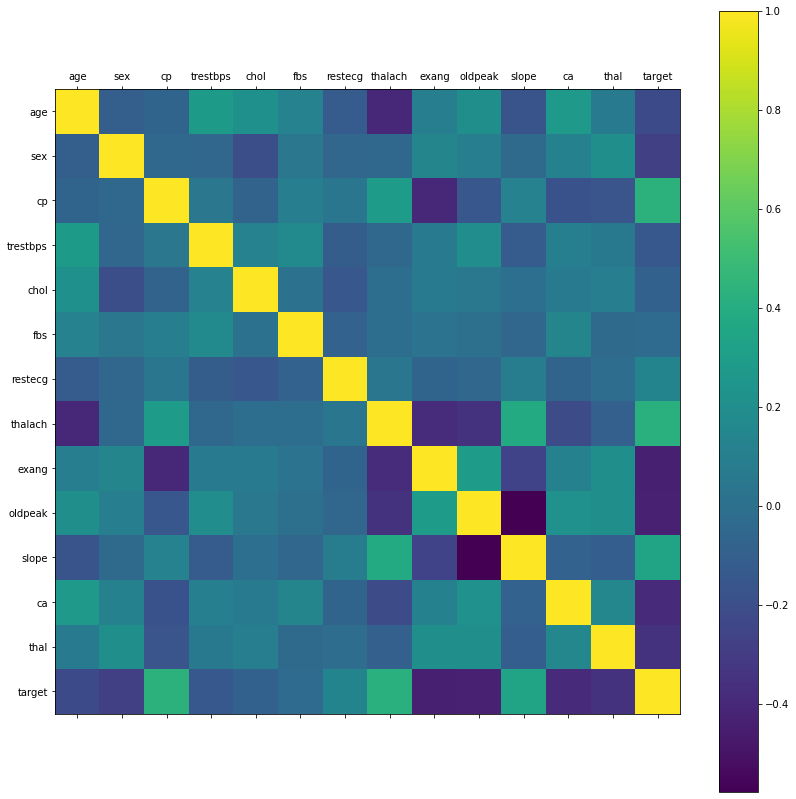

In [5]:
rcParams['figure.figsize']=20,14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#taking care of missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Taking care of duplicate values
data_dup=data.duplicated().any()

In [9]:
data_dup

True

In [10]:
data=data.drop_duplicates()

In [11]:
data_dup=data.duplicated().any()

In [12]:
data_dup

False

In [13]:
#Data processing
cate_val=[]
cont_val=[]

for column in data.columns:
  if data[column].nunique()<=10:
    cate_val.append(column)
  else:
    cont_val.append(column)

In [14]:
#Encoding categorical data
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [15]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [16]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [17]:
#Feature scaling
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [18]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [19]:
#Splitting dataset into the training set and test set
X=data.drop('target',axis=1)
y=data['target']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
180,0.064151,1,0.022661,2.061248,-0.768384,0.135360,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
229,1.060500,1,-0.376556,1.209652,-0.812118,0.652812,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
111,0.285561,1,1.049221,-2.332210,1.024705,-0.727060,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
247,1.281911,1,1.619532,-0.009677,-1.293190,-0.899544,1,0,0,0,...,1,1,0,0,0,1,0,1,0,0
60,1.835438,0,-1.232023,0.358057,-0.855851,-0.899544,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.378671,1,0.478910,0.996754,-1.205722,2.722620,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
104,-0.489377,1,-0.148432,-0.977399,0.587366,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
300,1.503322,1,0.707035,-1.035462,-0.374779,2.032684,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
194,0.617678,1,0.478910,-1.190298,0.237495,1.687716,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [22]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

In [23]:
#Logistic Regression
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred1=log.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_pred1)

0.9016393442622951

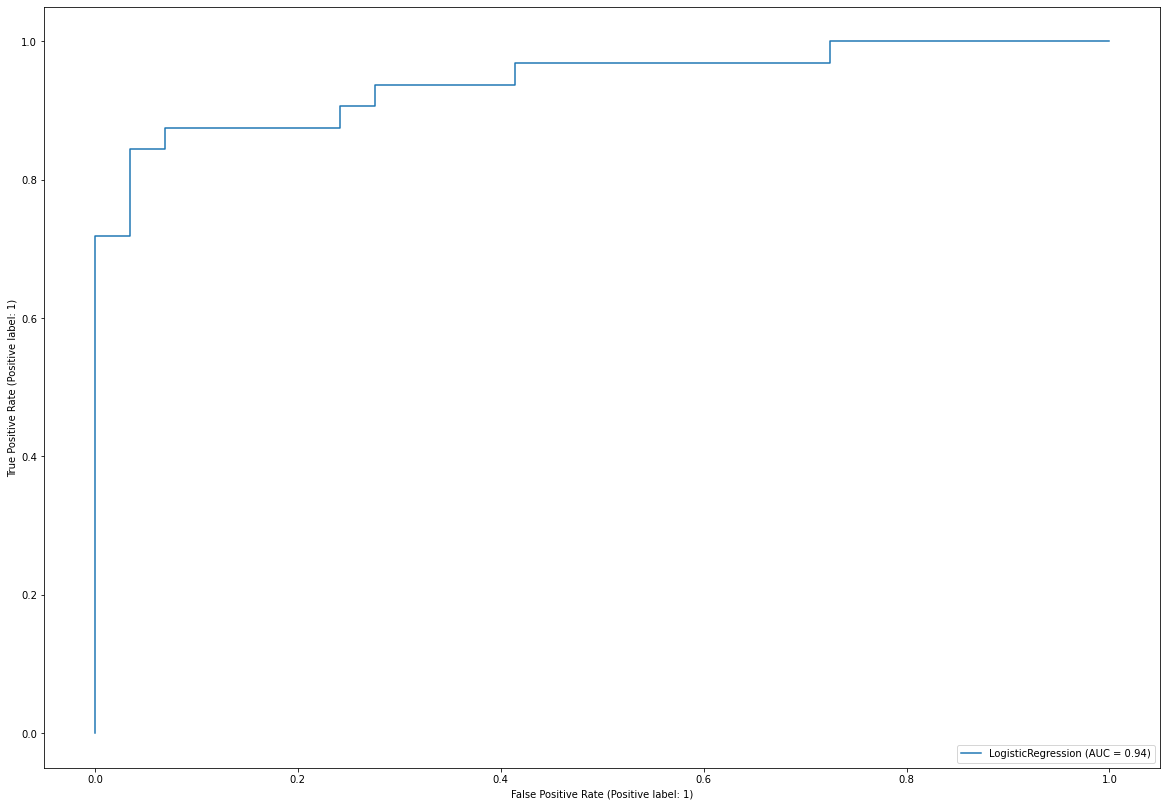

In [27]:
log.fit(X_train,y_train)
plot_roc_curve(log, X_test, y_test)

In [28]:
#SVM
svm=svm.SVC()

In [29]:
svm.fit(X_train,y_train)

SVC()

In [30]:
y_pred2=svm.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred2)

0.8688524590163934

In [32]:
svm.fit(X_train, y_train)

SVC()

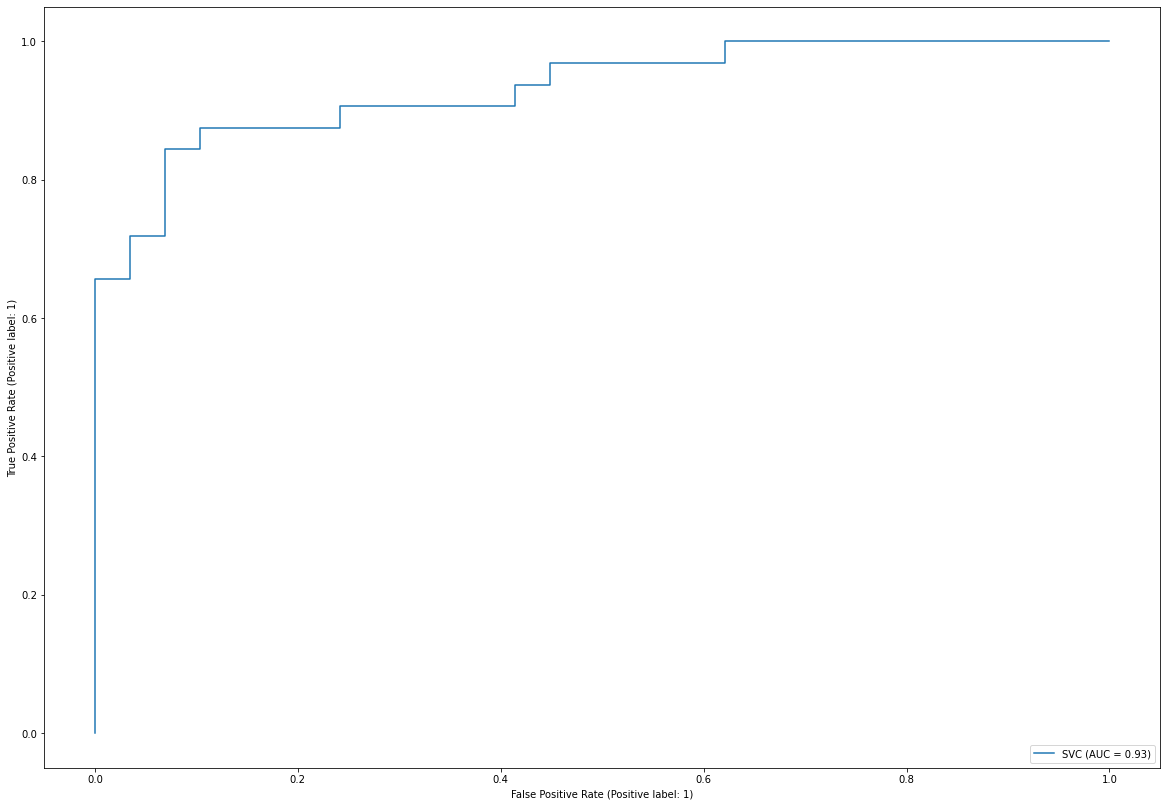

In [33]:
plot_roc_curve(svm, X_test, y_test)

In [34]:
#KNeighbors Classifier
knn=KNeighborsClassifier()

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred3=knn.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [38]:
score=[]

for k in range(1,40):
  knn=KNeighborsClassifier()
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  score.append(accuracy_score(y_test,y_pred))

In [39]:
score

[0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934]

In [40]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

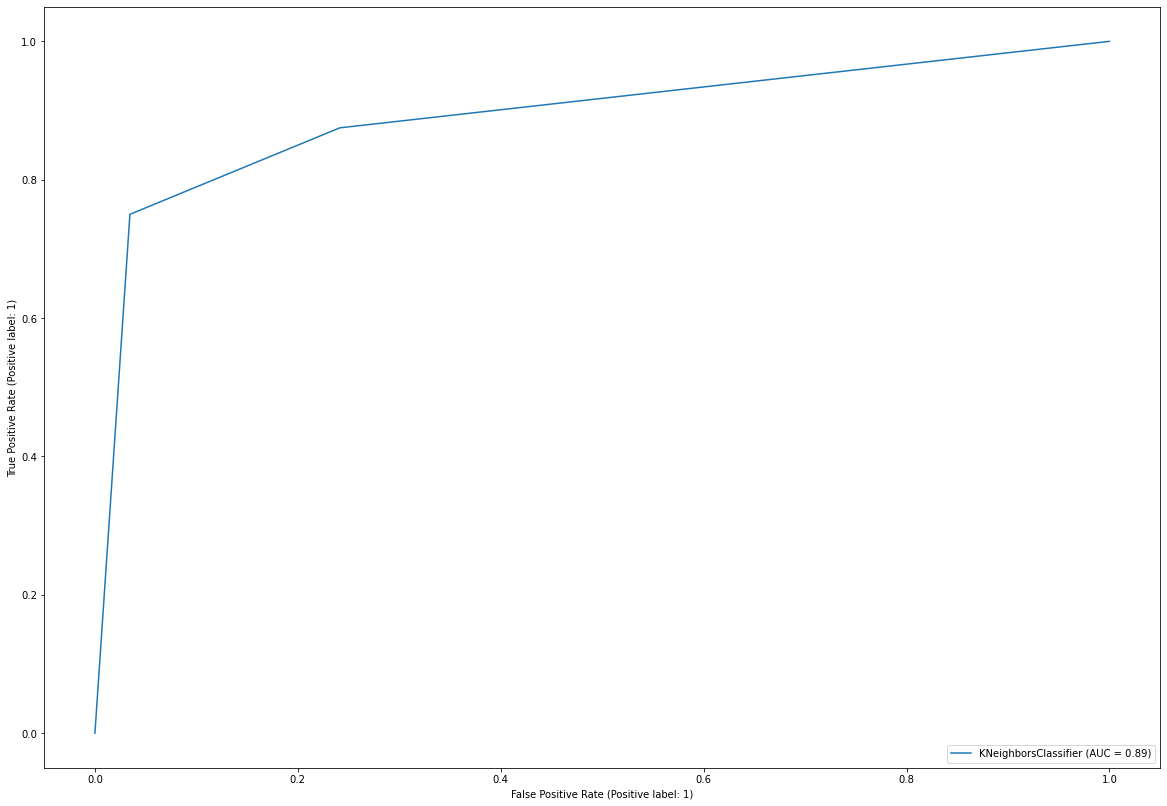

In [42]:
plot_roc_curve(knn, X_test, y_test)

In [43]:
#naive bayes classifier
nb=GaussianNB()

In [44]:
nb.fit(X_train,y_train)

GaussianNB()

In [45]:
y_pred6=nb.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred6)

0.8524590163934426

In [47]:
nb.fit(X_train,y_train)

GaussianNB()

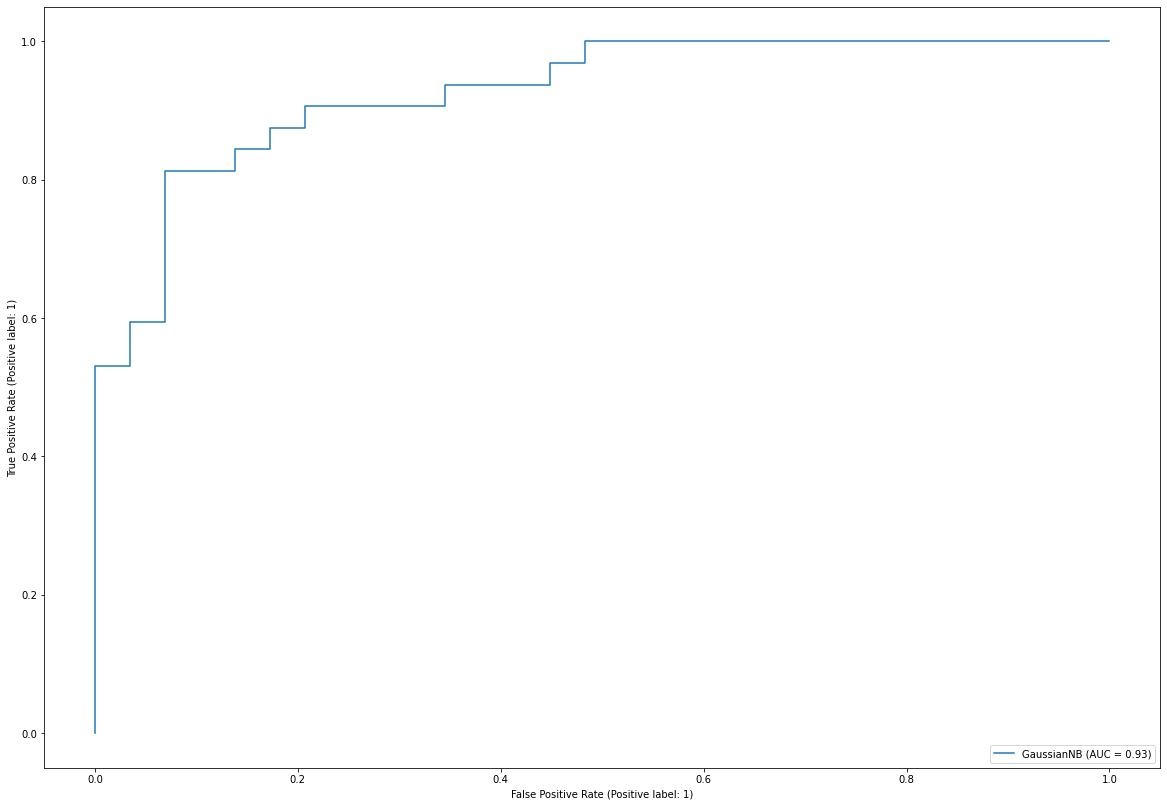

In [48]:
plot_roc_curve(nb, X_test, y_test)

In [49]:
#Non Linear ML Algorithms

In [50]:
data=pd.read_csv("heart_disease_data.csv")

In [51]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
data.shape

(303, 14)

In [53]:
X=data.drop('target',axis=1)
y=data['target']

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
#Decision Tree Classifier
dt=DecisionTreeClassifier()

In [56]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred4=dt.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

In [59]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

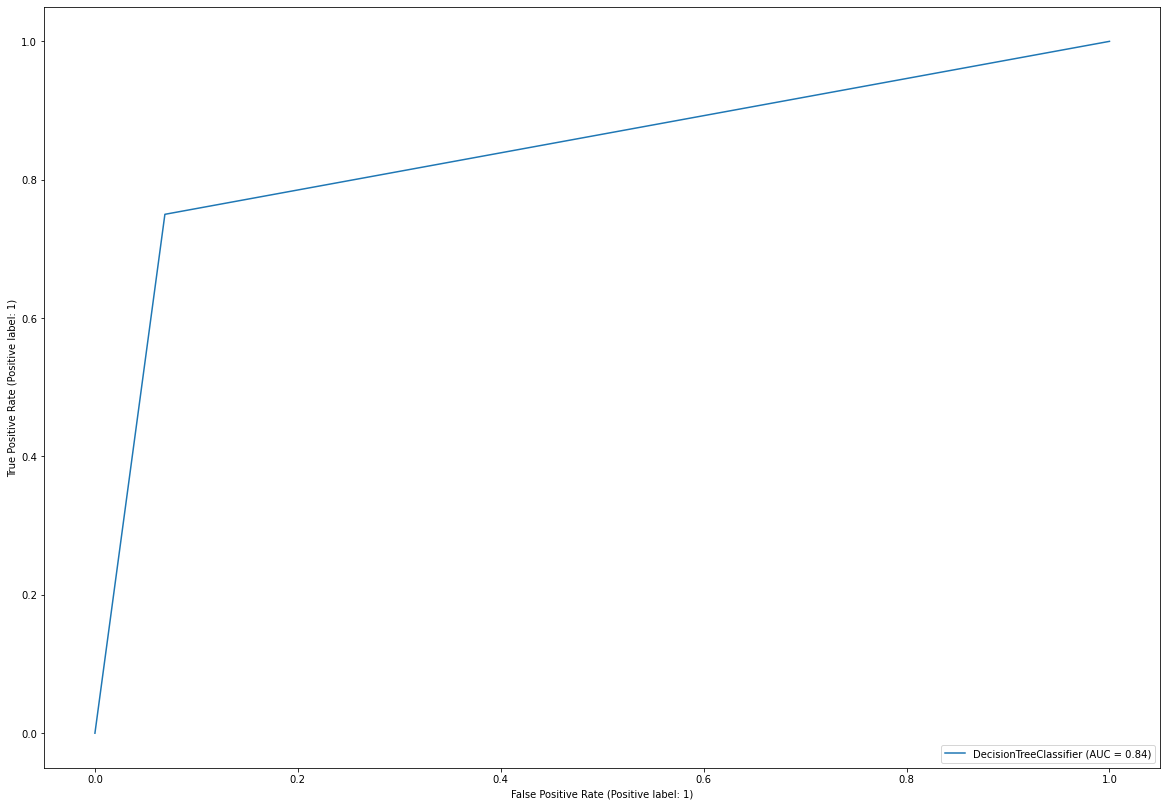

In [60]:
plot_roc_curve(dt, X_test, y_test)

In [61]:
#Random Forest Classifier
rf=RandomForestClassifier()

In [62]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_pred5=rf.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred5)

0.8688524590163934

In [65]:
rf.fit(X_train,y_train)

RandomForestClassifier()

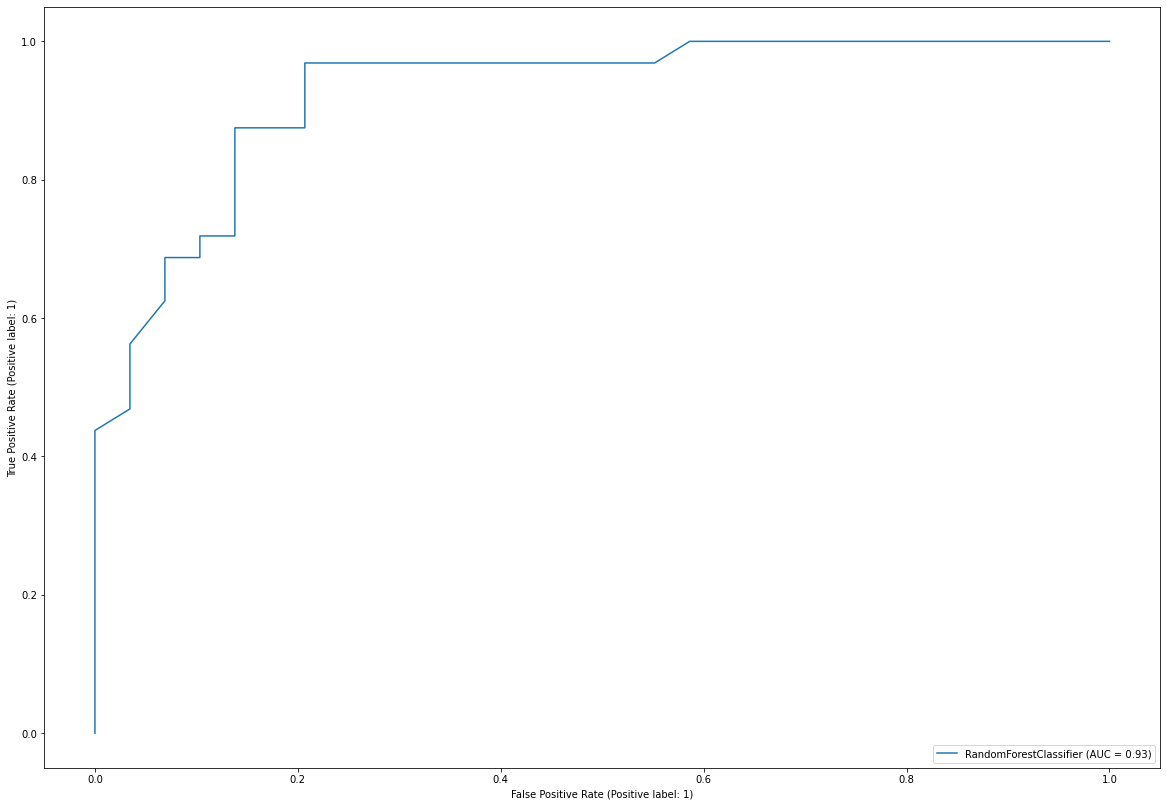

In [66]:
plot_roc_curve(rf, X_test, y_test)

# All ROC curves in a single plot

C:\Users\werty\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


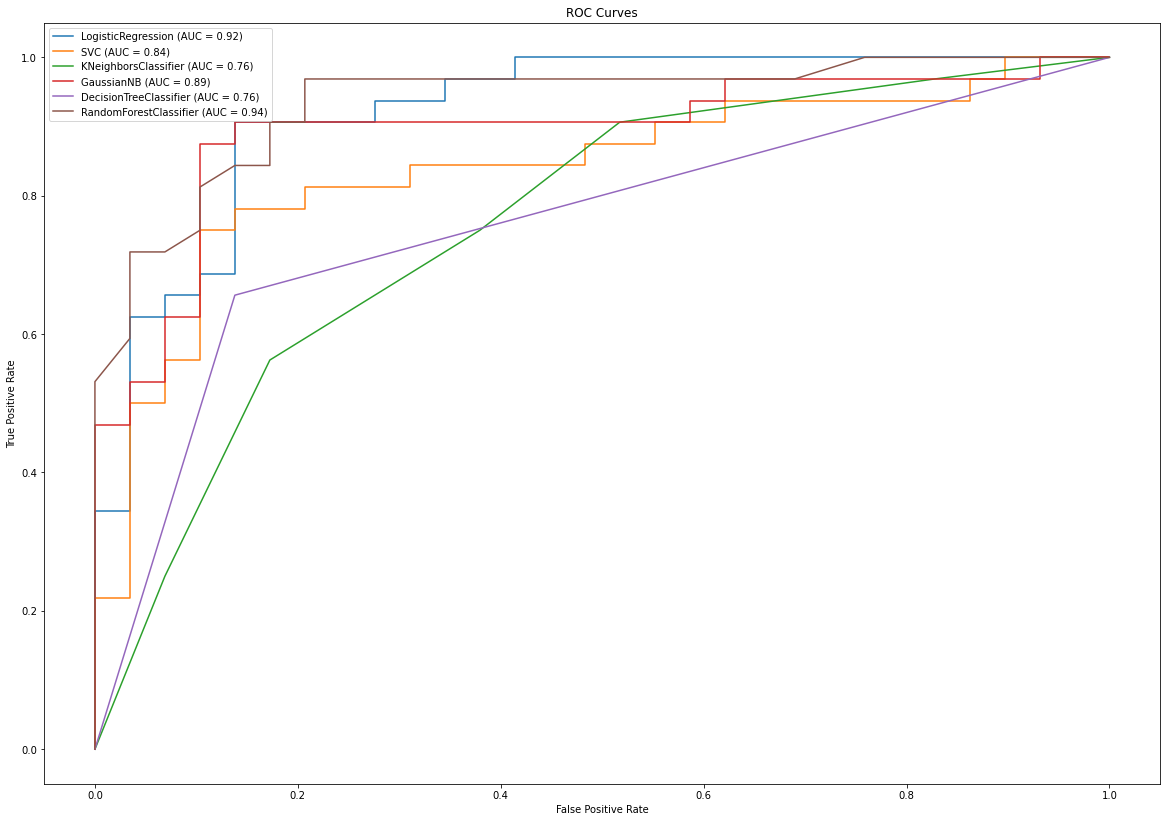

In [67]:
models = [LogisticRegression(random_state=42),
          SVC(random_state=42, probability=True),
          KNeighborsClassifier(),
          GaussianNB(),
          DecisionTreeClassifier(random_state=42, max_depth=10),
          RandomForestClassifier()]

# Plot the ROC curves for each classifier
fig, ax = plt.subplots()
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]  # Predict the probabilities of the positive class
    roc_display = plot_roc_curve(model, X_test, y_test, ax=ax)
    roc_auc = auc(roc_display.fpr, roc_display.tpr)
#    ax.plot(roc_display.fpr, roc_display.tpr, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})')

# Set the plot properties
#ax.plot([0, 1], [0, 1], 'k--', label='Random guess')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend()
plt.show()

In [68]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','NV'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                               accuracy_score(y_test,y_pred2),
                               accuracy_score(y_test,y_pred3),
                               accuracy_score(y_test,y_pred4),
                               accuracy_score(y_test,y_pred5),
                               accuracy_score(y_test,y_pred6)]})

In [69]:
final_data

,Models,ACC
0,LR,0.901639
1,SVM,0.868852
2,KNN,0.868852
3,DT,0.786885
4,RF,0.868852
5,NV,0.852459


In [70]:
import seaborn as sns

C:\Users\werty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

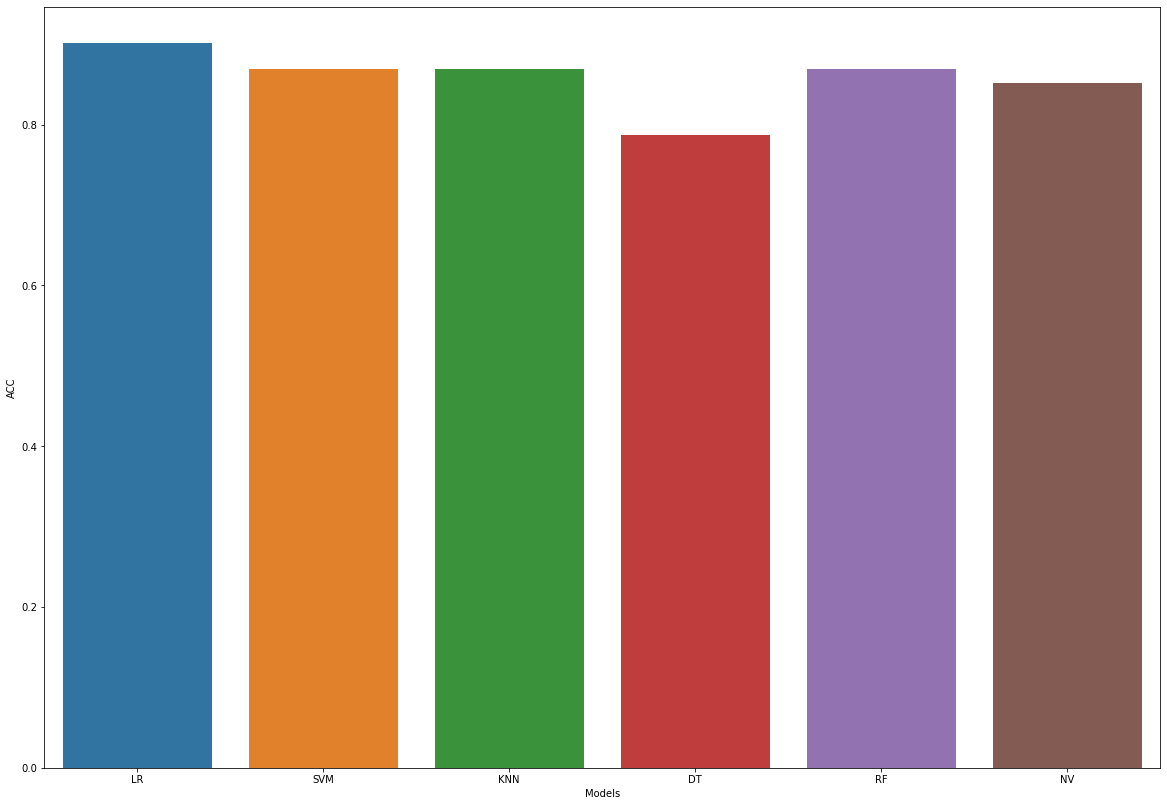

In [71]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [72]:
X=data.drop('target',axis=1)
y=data['target']

In [73]:
X.shape

(303, 13)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
log=LogisticRegression()
log.fit(X_train,y_train)

C:\Users\werty\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
#Prediction on a New Data 
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':21,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3
    },index=[0])

In [77]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,21,168,0,1.0,2,2,3


In [78]:
p=rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [79]:
#Save Model Using Joblib
import joblib

In [80]:
joblib.dump(log,'model_joblib_heart')

['model_joblib_heart']

In [81]:
model=joblib.load('model_joblib_heart')

In [82]:
model.predict(new_data)

array([1], dtype=int64)

In [83]:
from tkinter import *
import joblib

In [84]:
def show_entry_fields():
  p1=int(e1.get())
  p2=int(e2.get())
  p3=int(e3.get())
  p4=int(e4.get())
  p5=int(e5.get())
  p6=int(e6.get())
  p7=int(e7.get())
  p8=int(e8.get())
  p9=int(e9.get())
  p10=float(e10.get())
  p11=int(e11.get())
  p12=int(e12.get())
  p13=int(e13.get())
  model = joblib.load('model_joblib_heart')
  result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])

  if result == 0:
    Label(master, text = "No Heart Diseases").grid(row=31)

  else:
    Label(master, text="Possibility of Heart Diseases").grid(row=31)

master =Tk()
master.title("Heart Disease Prediction System")

label = Label(master, text ="Heart Disease Prediction System"
                              ,bg = "black", fg = "white"). \
                                  grid(row=0, columnspan=2)

Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP [1/0]").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()